# CNN mit Keras/TensorFlow zur Erkennung von Autos

Dieses Notebook implementiert ein Convolutional Neural Network (CNN) mit Keras/TensorFlow zur Erkennung von Autos im CIFAR-10 Datensatz.

## Überblick
- Laden der vorbereiteten Daten aus dem vorherigen Notebook
- Definition eines CNN-Modells mit Keras
- Training des Modells mit Early Stopping und Checkpointing
- Evaluierung des Modells auf Testdaten
- Visualisierung des Trainingsverlaufs und der Ergebnisse

## Importieren der benötigten Bibliotheken

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import os

2025-03-27 10:41:56.759721: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 10:41:56.760397: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 10:41:56.762625: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 10:41:56.768656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743068516.777954 1751787 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743068516.78

## Vorbereitung der Verzeichnisse

Wir erstellen ein Verzeichnis für die Modelle, falls es noch nicht existiert.

In [2]:
# Verzeichnisse
data_dir = '../data'
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)

## Laden der vorbereiteten Daten

Wir laden die im vorherigen Notebook vorbereiteten Daten.

In [3]:
# Laden der vorbereiteten Daten
print("Laden der vorbereiteten Daten...")
x_train = np.load(os.path.join(data_dir, 'x_train.npy'))
y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
x_test = np.load(os.path.join(data_dir, 'x_test.npy'))
y_test = np.load(os.path.join(data_dir, 'y_test.npy'))
y_train_binary = np.load(os.path.join(data_dir, 'y_train_binary.npy'))
y_test_binary = np.load(os.path.join(data_dir, 'y_test_binary.npy'))

# Klassen im CIFAR-10 Datensatz
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
automobile_class_index = class_names.index('automobile')

print(f"Trainingsdaten: {x_train.shape[0]} Bilder")
print(f"Testdaten: {x_test.shape[0]} Bilder")
print(f"Anzahl der Auto-Bilder im Trainingsdatensatz: {np.sum(y_train_binary)}")
print(f"Anzahl der Auto-Bilder im Testdatensatz: {np.sum(y_test_binary)}")

Laden der vorbereiteten Daten...
Trainingsdaten: 50000 Bilder
Testdaten: 10000 Bilder
Anzahl der Auto-Bilder im Trainingsdatensatz: 5000
Anzahl der Auto-Bilder im Testdatensatz: 1000


## Definition des CNN-Modells

Wir definieren ein CNN-Modell mit mehreren Convolutional Blocks, gefolgt von Fully Connected Layers. Jeder Convolutional Block besteht aus:
- Zwei Convolutional Layers mit ReLU-Aktivierung
- Batch Normalization nach jeder Convolution
- Max Pooling
- Dropout zur Regularisierung

Die Fully Connected Layers bestehen aus:
- Einem Dense Layer mit ReLU-Aktivierung
- Batch Normalization
- Dropout
- Einem Output Layer mit Sigmoid-Aktivierung für binäre Klassifikation

In [4]:
# Definition des CNN-Modells
def create_car_detection_model():
    model = Sequential([
        # Erster Convolutional Block
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Zweiter Convolutional Block
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Dritter Convolutional Block
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binäre Klassifikation: Auto vs. Nicht-Auto
    ])
    
    # Kompilieren des Modells
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

## Modell erstellen und Zusammenfassung anzeigen

Wir erstellen das Modell und zeigen eine Zusammenfassung der Architektur an.

In [5]:
# Modell erstellen
print("Erstellen des CNN-Modells...")
model = create_car_detection_model()
model.summary()

Erstellen des CNN-Modells...


/home/daniel/Data/dhbw/CNNsForCarDetection/.venv/lib64/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-27 10:41:59.024728: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,340,449 (5.11 MB)

 Trainable params: 1,338,529 (5.11 MB)

 Non-trainable params: 1,920 (7.50 KB)

## Callbacks für das Training

Wir definieren zwei Callbacks für das Training:
1. **Early Stopping**: Beendet das Training, wenn sich die Validation Loss für 10 Epochen nicht verbessert
2. **Model Checkpoint**: Speichert das beste Modell basierend auf der Validation Accuracy

In [6]:
# Callbacks für das Training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(
        filepath=os.path.join(models_dir, 'car_detection_model.keras'),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

## Training des Modells

Wir trainieren das Modell mit den folgenden Parametern:
- Batch-Größe: 64
- Maximale Anzahl an Epochen: 50
- Validation Split: 20% der Trainingsdaten
- Early Stopping und Model Checkpoint Callbacks

In [7]:
# Training des Modells
print("Training des CNN-Modells...")
history = model.fit(
    x_train, y_train_binary,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Training des CNN-Modells...
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8170 - loss: 0.4288
Epoch 1: val_accuracy improved from -inf to 0.93640, saving model to ../models/car_detection_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.8171 - loss: 0.4285 - val_accuracy: 0.9364 - val_loss: 0.1820
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9403 - loss: 0.1529
Epoch 2: val_accuracy improved from 0.93640 to 0.94660, saving model to ../models/car_detection_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9403 - loss: 0.1528 - val_accuracy: 0.9466 - val_loss: 0.1543
Epoch 3/50
304/625 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9575 - loss: 0.1094

KeyboardInterrupt: 

## Speichern des Modells

Wir speichern das trainierte Modell für die spätere Verwendung.

In [ ]:
# Speichern des Modells
model.save(os.path.join(models_dir, 'keras_cnn', 'car_detection_model.keras'))
print(f"Modell wurde gespeichert unter: {os.path.join(models_dir, 'keras_cnn', 'car_detection_model.keras')}")

## Evaluierung des Modells auf den Testdaten

Wir evaluieren das trainierte Modell auf den Testdaten, um seine Leistung zu messen.

In [8]:
# Evaluierung des Modells auf den Testdaten
print("Evaluierung des Modells auf den Testdaten...")
test_loss, test_accuracy = model.evaluate(x_test, y_test_binary)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Evaluierung des Modells auf den Testdaten...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9591 - loss: 0.1118
Test Accuracy: 0.9556
Test Loss: 0.1192


## Visualisierung des Trainingsverlaufs

Wir visualisieren den Trainingsverlauf, um zu sehen, wie sich Accuracy und Loss während des Trainings entwickelt haben.

NameError: name 'history' is not defined

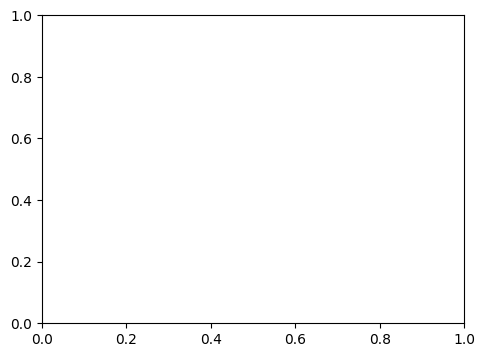

In [9]:
# Visualisierung des Trainingsverlaufs
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(models_dir, 'training_history.png'))
print(f"Trainingsverlauf wurde gespeichert unter: {os.path.join(models_dir, 'training_history.png')}")

## Detaillierte Evaluierung mit Precision, Recall und F1-Score

Wir berechnen weitere Metriken wie Precision, Recall und F1-Score, um die Leistung des Modells besser zu verstehen.

In [ ]:
# Vorhersagen auf den Testdaten
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Berechnung von Precision, Recall und F1-Score
from sklearn.metrics import classification_report, confusion_matrix

print("Klassifikationsbericht:")
print(classification_report(y_test_binary, y_pred_binary))

## Visualisierung der Konfusionsmatrix

Die Konfusionsmatrix zeigt uns, wie viele Bilder korrekt und falsch klassifiziert wurden.

In [ ]:
# Konfusionsmatrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Konfusionsmatrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Nicht-Auto', 'Auto'])
plt.yticks(tick_marks, ['Nicht-Auto', 'Auto'])

# Beschriftung der Zellen mit den Werten
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Tatsächliche Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.savefig(os.path.join(models_dir, 'confusion_matrix.png'))
print(f"Konfusionsmatrix wurde gespeichert unter: {os.path.join(models_dir, 'confusion_matrix.png')}")

## Visualisierung einiger Vorhersagen

Wir visualisieren einige Vorhersagen des Modells, um zu sehen, welche Bilder korrekt und falsch klassifiziert wurden.

In [ ]:
# Visualisierung einiger Vorhersagen
def plot_predictions(x, y_true, y_pred, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i])
        
        predicted = "Auto" if y_pred[i] > 0.5 else "Nicht-Auto"
        actual = "Auto" if y_true[i] == 1 else "Nicht-Auto"
        
        color = 'green' if predicted == actual else 'red'
        plt.xlabel(f"P: {predicted}, A: {actual}", color=color)
    
    plt.tight_layout()
    plt.savefig(os.path.join(models_dir, 'prediction_examples.png'))
    print(f"Vorhersagebeispiele wurden gespeichert unter: {os.path.join(models_dir, 'prediction_examples.png')}")

# Zufällige Auswahl von Testbildern
np.random.seed(42)
random_indices = np.random.choice(len(x_test), 25, replace=False)
plot_predictions(
    x_test[random_indices],
    y_test_binary[random_indices],
    y_pred[random_indices],
    class_names
)

## Zusammenfassung

In diesem Notebook haben wir:
1. Ein CNN-Modell mit Keras/TensorFlow zur Erkennung von Autos definiert
2. Das Modell auf dem CIFAR-10 Datensatz trainiert
3. Das Modell auf den Testdaten evaluiert
4. Den Trainingsverlauf und die Ergebnisse visualisiert

Das trainierte Modell kann nun für die Erkennung von Autos in Bildern verwendet werden, wie wir in den nächsten Notebooks sehen werden.

In [ ]:
print("CNN-Modell mit Keras/TensorFlow wurde erfolgreich trainiert und evaluiert.")